In [31]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
#Load and Preprocess the data
#Using the MNIST dataset

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
#Normalize the data
X_train_full = X_train_full/255.0
X_test = X_test/255.0

In [5]:
#Splitting off validation set

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
#Flatten input images
X_train = X_train.reshape(-1, 28*28)
X_valid = X_valid.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [7]:
model = keras.models.Sequential([
    keras.layers.Dense(300, activation='relu', input_shape=[784]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/home/onlyahad/miniconda3/envs/ml_global/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1752431387.779357    6358 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1752431387.783846    6358 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
model.compile(loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [9]:
history = model.fit(X_train, y_train,
    epochs = 30,
    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6700 - loss: 1.0260 - val_accuracy: 0.7946 - val_loss: 0.5581
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8254 - loss: 0.5095 - val_accuracy: 0.8326 - val_loss: 0.4740
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8414 - loss: 0.4485 - val_accuracy: 0.8468 - val_loss: 0.4346
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8521 - loss: 0.4223 - val_accuracy: 0.8636 - val_loss: 0.4007
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8589 - loss: 0.4026 - val_accuracy: 0.8688 - val_loss: 0.3902
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8685 - loss: 0.3769 - val_accuracy: 0.8694 - val_loss: 0.3818
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8693 - loss: 0.3687 - val_accuracy: 0.8752 - val_loss: 0.3564
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8749 - loss: 0.3525 - 

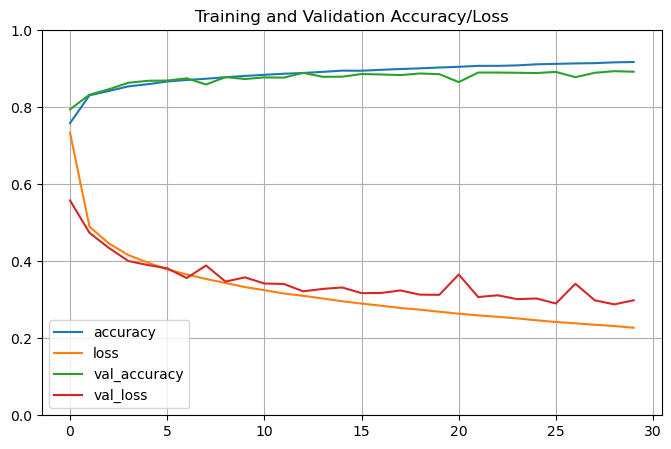

In [12]:
#Plotting learning curves

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title('Training and Validation Accuracy/Loss')
plt.show()

In [13]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8828 - loss: 0.3386


[0.3357216715812683, 0.8817999958992004]

In [18]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_pred = y_proba.argmax(axis=1)

print(y_pred)
print(y_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[9 2 1]
[9 2 1]


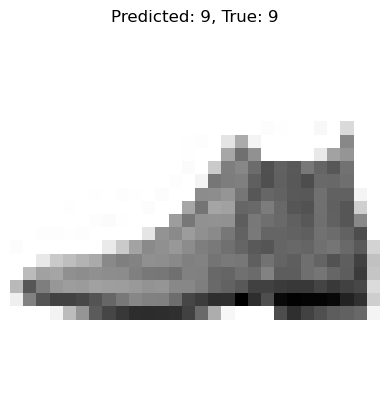

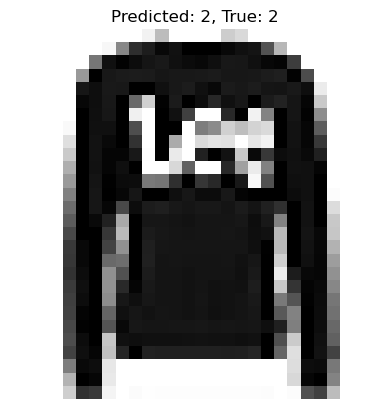

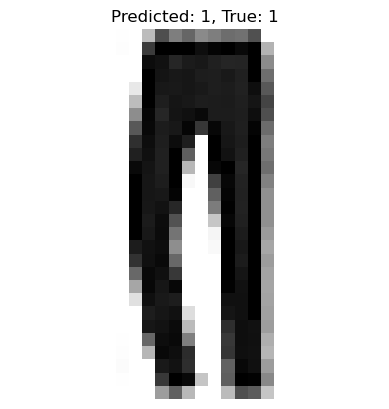

In [29]:
for i in range(3):
    plt.imshow(X_new[i].reshape(28, 28), cmap='binary')
    plt.title(f'Predicted: {y_pred[i]}, True: {y_test[i]}')
    plt.axis('off')
    plt.show()